In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\apil
[nltk_data]     xetri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['Message'].isnull().sum()

0

In [4]:
mail_data=df.where((pd.notnull(df))," ")

In [5]:
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
mail_data.shape

(5572, 2)

In [8]:
mail_data.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


array([<Axes: ylabel='Message'>], dtype=object)

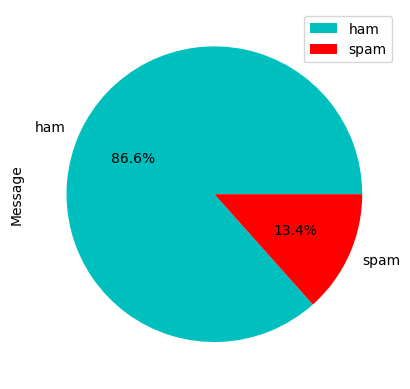

In [9]:
mail_data.groupby('Category').count().plot.pie(label=mail_data['Category'],autopct="%0.1f%%",colors=['c','r'],subplots=True)

In [10]:
# plt.hist(mail_data['Message'])
# plt.show()

In [11]:
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# df['number']=mail_data['Category'].replace({'ham':0,"spam":1})

In [13]:
words = stopwords.words("english")
stemmer=PorterStemmer()

In [14]:
# mail_data.loc[mail_data['Category'] == "spam" ,"Category"] =1
# mail_data.loc[mail_data['Category'] == "ham" ,"Category"] =0

In [15]:
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 1 for spam and 0 for ham

In [16]:
y=mail_data['Category']

In [42]:
x=mail_data['Message']
def data_processs(x):
    mail_data['clean']=x.apply(lambda x:" ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",x).split() if i not in words]).lower())
    print("Data pre-process successfully!")
data_processs(x)    

Data pre-process successfully!


In [43]:
mail_data

,Category,Message,clean
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,thi nd time tri contact u u pound prize claim ...
5568,ham,Will ü b going to esplanade fr home?,will b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood so suggest
5570,ham,The guy did some bitching but I acted like i'd...,the guy bitch i act like interest buy someth e...


In [44]:
x=mail_data['clean']

In [45]:
x

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    thi nd time tri contact u u pound prize claim ...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: clean, Length: 5572, dtype: object

In [46]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=3) #Splitting dataset


In [48]:
x_train

3075                                don know i msg recent
1787    do know god creat gap finger so one made come ...
1614                                 thnx dude u guy nite
4304                                             yup free
3266    do want new nokia colour phone deliveredtomorr...
                              ...                        
789     free top polyphon tone call nation rate get to...
968     what u want come back beauti necklac token hea...
1667           guess spent last night phase fourth dimens
3321    eh sorri leh i din c ur msg not sad alreadi la...
1688    free top rington sub weekli rington get st wee...
Name: clean, Length: 4457, dtype: object

In [49]:
y_train

3075     ham
1787     ham
1614     ham
4304     ham
3266    spam
        ... 
789     spam
968      ham
1667     ham
3321     ham
1688    spam
Name: Category, Length: 4457, dtype: object

In [50]:
x_train.shape

(4457,)

In [51]:
y_train.shape

(4457,)

In [52]:
x_test.shape

(1115,)

In [53]:
y_test.shape

(1115,)

In [54]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")



# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1450)),
                     ('clf', LogisticRegression(random_state=0))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(x_train, y_train)

# #Creating pickle fil
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [55]:
# X_train_features = vectorizer.fit_transform(x_train)
# X_test_features = vectorizer.transform(x_test)


In [56]:
# pipeline.fit_transform(X_train)

In [57]:
# pipeline.fit_transform(Y_train)

In [58]:
#evaluate model
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(x_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.9641255605381166


['spam' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [59]:
y_test.shape

(1115,)

In [61]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)

print(classification_report(model.predict(x_test),ytest))
print(confusion_matrix(model.predict(x_test),ytest))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1000
        spam       0.74      1.00      0.85       115

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.97      0.96      0.97      1115

[[960  40]
 [  0 115]]


In [62]:
class_names = np.array(['ham',
'spam'])

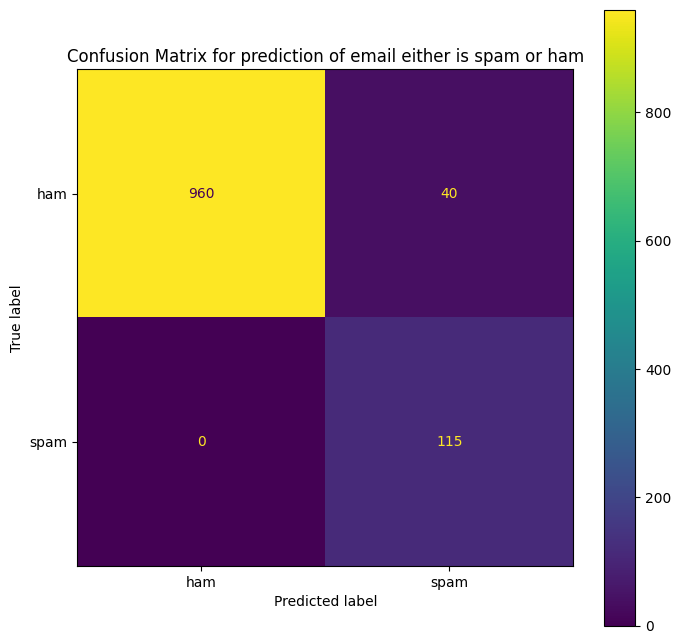

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(x_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for prediction of email either is spam or ham')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [39]:
#Evaluating model with rea
menu=["If this was you You can ignore this message. There's no need to take any action."]
model.predict(menu)    

array(['ham'], dtype=object)

In [68]:
# from sklearn.naive_bayes import MultinomialNB
# import pickle
# pickle.dump(tdidf,open("Vectorizer.pkl","wb"))
# pickle.dump(mnb,open("Vectorizer.pkl","wb"))